In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import os

NAME = "COVID-19_Xray-CNN-{}".format(int(time.time()))
PATH = os.path.join('logs', NAME)
tensorboard = TensorBoard(log_dir=PATH)

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )
IMG_SIZE = 50

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

history= model.fit(X, y, batch_size=32, epochs=5, validation_split=0.30, callbacks=[tensorboard])

Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 8s 5ms/sample - loss: 0.2985 - accuracy: 0.8526 - val_loss: 0.0993 - val_accuracy: 0.9641
Epoch 2/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0904 - accuracy: 0.9658 - val_loss: 0.0583 - val_accuracy: 0.9797
Epoch 3/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0808 - accuracy: 0.9719 - val_loss: 0.0617 - val_accuracy: 0.9782
Epoch 4/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0580 - accuracy: 0.9766 - val_loss: 0.0512 - val_accuracy: 0.9828
Epoch 5/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0643 - accuracy: 0.9739 - val_loss: 0.0510 - val_accuracy: 0.9844


In [4]:
history.history

{'loss': [0.29852490436487844,
  0.09041187084327987,
  0.08078261379748883,
  0.0580210164332811,
  0.06433435841741093],
 'accuracy': [0.8526457, 0.9658406, 0.9718687, 0.97655725, 0.9738781],
 'val_loss': [0.09932602844353586,
  0.05834105379905627,
  0.06168834143372721,
  0.051195295798184,
  0.05099936569866531],
 'val_accuracy': [0.96411854, 0.97971916, 0.9781591, 0.9828393, 0.9843994]}

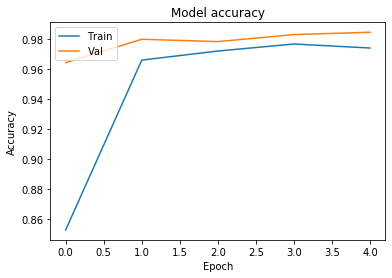

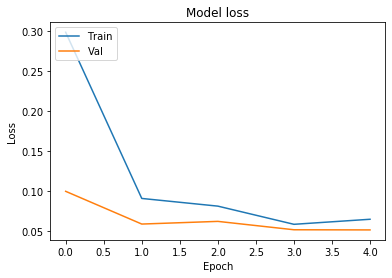

In [6]:
import matplotlib.pyplot as plt
#plot training validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot training validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1936)              0